<a href="https://colab.research.google.com/github/monjar/AI-Assignments/blob/master/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [3]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_data.data.shape[1]

4

In [8]:
iris_data.target.shape[0]

150

In [9]:
iris_data.target_names.shape[0]

3

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [102]:
x, y = make_blobs(n_samples=300, centers=3, n_features=3,
                  cluster_std=8,center_box=(-50, 50), random_state=None)

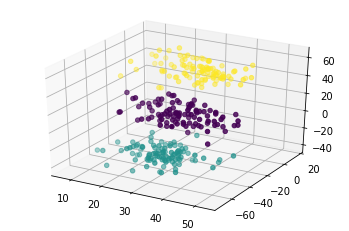

In [103]:
fig = plt.figure()
ax=fig.add_subplot(projection="3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

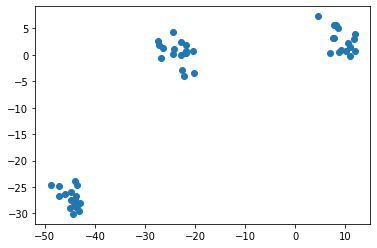

In [100]:
x, y = make_blobs(n_samples=50, centers=3, n_features=2,
                  cluster_std=2,center_box=(-50, 50), random_state=170)
plt.scatter(x[:,0], x[:,1])

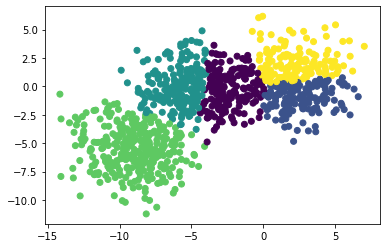

In [92]:
from sklearn.cluster import KMeans
#y_pred=KMeans(n_clusters=5, init='random', n_init=1).fit_predict(x)
#y_pred=KMeans(n_clusters=5, init='k-means++', n_init=1).fit_predict(x)
y_pred=KMeans(n_clusters=5, init='random', n_init=1, random_state=1).fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=y_pred)

Number of iterations for k_means_iris_8: 13
Number of iterations for k_means_iris_3: 3
Number of iterations for k_means_iris_bad_init: 4


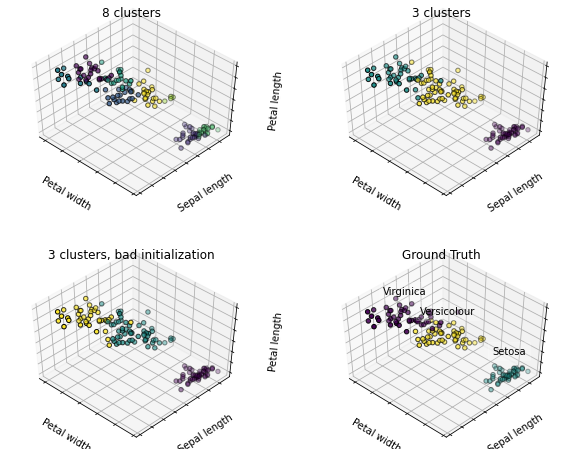

In [97]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
  ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
  est.fit(X)
  labels = est.labels_
  print(f"Number of iterations for {name}: {est.n_iter_}")
  ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

  ax.xaxis.set_ticklabels([])
  ax.yaxis.set_ticklabels([])
  ax.zaxis.set_ticklabels([])
  ax.set_xlabel("Petal width")
  ax.set_ylabel("Sepal length")
  ax.set_zlabel("Petal length")
  ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
  ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
  )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


Initialization complete
Iteration 0, inertia 806.367214315293
Iteration 1, inertia 568.6500867030448
Iteration 2, inertia 505.44404404848706
Iteration 3, inertia 478.62167175487457
Iteration 4, inertia 468.06602029020667
Iteration 5, inertia 439.0382612197458
Iteration 6, inertia 393.8470235172791
Iteration 7, inertia 387.23367061651675
Iteration 8, inertia 385.6984976198173
Converged at iteration 8: strict convergence.
Number of iterations: 9


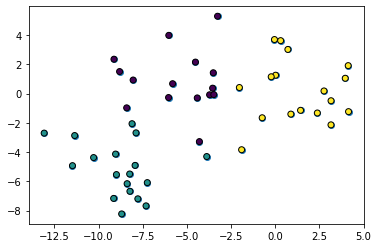

In [116]:
x, y = make_blobs(n_samples=50, centers=3, n_features=2,
                  cluster_std=2, random_state=170)
plt.scatter(x[:,0], x[:,1])
k_means_model = KMeans(n_clusters=3, init='random', n_init=1, random_state=1, verbose=1)
k_means_model.fit(x)
labels = k_means_model.labels_
plt.scatter(x[:,0], x[:,1],c=labels.astype(float), edgecolor="k")
print(f"Number of iterations: {k_means_model.n_iter_}")


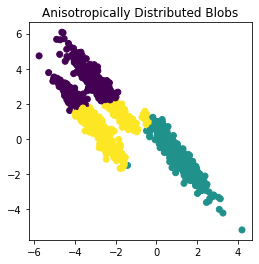

In [162]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
axs.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_kmeans)
axs.set_title("Anisotropically Distributed Blobs")
plt.show()

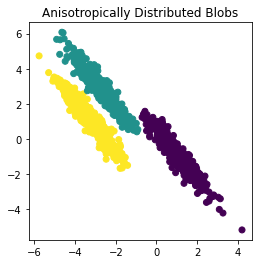

In [159]:
from sklearn.mixture import GaussianMixture

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

y_pred_gm = GaussianMixture(n_components=3, random_state= random_state).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_gm)
ax1.set_title("Anisotropically Distributed Blobs")

plt.show()

In [163]:
from sklearn import metrics

print(f"Calinski for gm: {metrics.calinski_harabasz_score(X_aniso, y_pred_gm)}")
print(f"Calinski for kmeans: {metrics.calinski_harabasz_score(X_aniso, y_pred_kmeans)}")

print("=============")

print(f"Davies for gm: {metrics.davies_bouldin_score(X_aniso, y_pred_gm)}")
print(f"Davies for kmeans: {metrics.davies_bouldin_score(X_aniso, y_pred_kmeans)}")

print("=============")

print(f"Silhouette for gm: {metrics.silhouette_score(X_aniso, y_pred_gm)}")
print(f"Silhouette for kmeans: {metrics.silhouette_score(X_aniso, y_pred_kmeans)}")




Calinski for gm: 2807.6874529848137
Calinski for kmeans: 3716.4999204520846
Davies for gm: 0.8576111248168529
Davies for kmeans: 0.7056779167462176
Silhouette for gm: 0.4769285484691789
Silhouette for kmeans: 0.5101937778840281


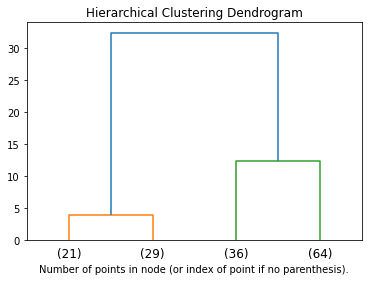

In [147]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

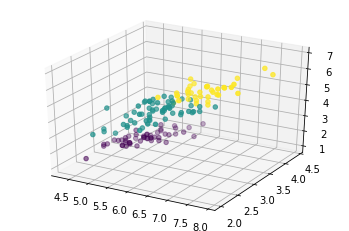

Calinski for kmeans: 561.62775662962
Davies for kmeans: 0.6619715465007465
Silhouette for kmeans: 0.5528190123564095


In [153]:
iris_data = datasets.load_iris()
x = iris_data.data
y_pred_kmeans = KMeans( n_clusters=3,n_init=10,random_state=7).fit_predict(x)
fig = plt.figure()
ax=fig.add_subplot(projection="3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred_kmeans)
plt.show()

print(f"Calinski for kmeans: {metrics.calinski_harabasz_score(x, y_pred_kmeans)}")
print(f"Davies for kmeans: {metrics.davies_bouldin_score(x, y_pred_kmeans)}")
print(f"Silhouette for kmeans: {metrics.silhouette_score(x, y_pred_kmeans)}")

